# Homework 2

**DUE NOV 11th at 11:59 PM**

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** (Use the print option). Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

Sai Kathika 
5528633
saiprem@ucsb.edu

## Problem 1 (HW1 Problem 4)

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [2]:
from sklearn.cluster import AgglomerativeClustering

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

In [4]:
dataset = pd.read_csv('iris.csv', header = 0)
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

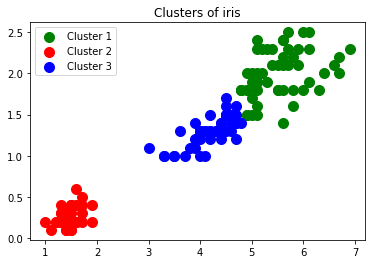

In [4]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(X)
predict = clustering.fit_predict(X)

plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.title('Clusters of iris')
plt.legend()
plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

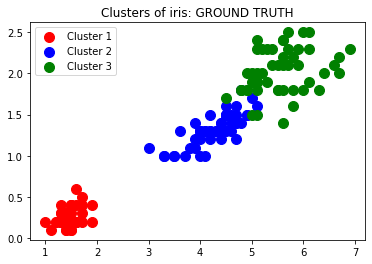

In [6]:
plt.scatter(X[y == 'Setosa', 0], X[y == 'Setosa', 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 'Versicolor', 0], X[y == 'Versicolor', 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 'Virginica', 0], X[y == 'Virginica', 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of iris: GROUND TRUTH')
plt.legend()
plt.show()

The performance of the Agglomerative Clustering model I built appears to be performing quite well as it correctly identifies a majority of the points into the right clusters. It appears to have gotten all the points correctly labeled for the Setosa cluster(red) but it mixes up some data points on the borders of the Versicolor(blue) and Virginica(clusters). This would be hard to improve since from the plot of the ground truth, some of the green points are much closer to the blue cluster then the green cluster. 

c) Train a clustering model using K-mean clustering.

In [12]:
from sklearn.cluster import KMeans

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

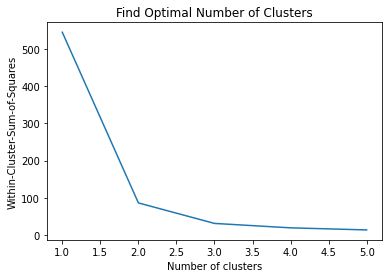

In [13]:
# Find optimal number of clusters by using Within-Cluster-Sum-of-Squares 
sumSquares = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    sumSquares.append(kmeans.inertia_)
plt.plot(range(1, 6), sumSquares)
plt.title('Find Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

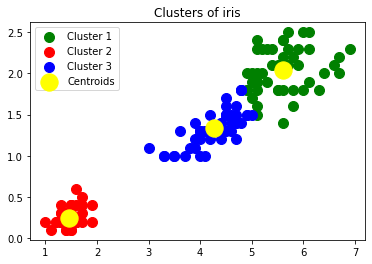

In [14]:
#optimal number of clusters is 3 
kmeans = KMeans(n_clusters = 3,init = 'k-means++')
predict = kmeans.fit_predict(X)
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris')
plt.legend()
plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

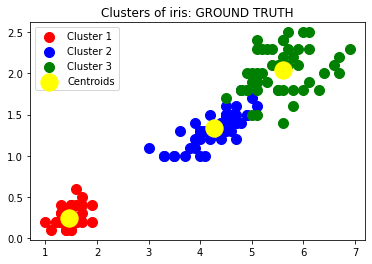

In [15]:
plt.scatter(X[y == 'Setosa', 0], X[y == 'Setosa', 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 'Versicolor', 0], X[y == 'Versicolor', 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 'Virginica', 0], X[y == 'Virginica', 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of iris: GROUND TRUTH')
plt.legend()
plt.show()

The performance of the K-Means Clustering model I built appears to be performing quite well as it correctly identifies a majority of the points into the right arbitrary clusters. In fact, this model is almost indistinguishable from the  Agglomerative Clustering model.Like the Agglomerative Clustering model it appears to have gotten all the points correctly labeled for the Setosa cluster(red) but it mixes up some data points on the borders of the Versicolor(blue) and Virginica(clusters). This would be hard to improve since from the plot of the ground truth, some of the green points are much closer to the blue cluster then the green cluster. 

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_projected = pca.fit_transform(X_sc)


Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

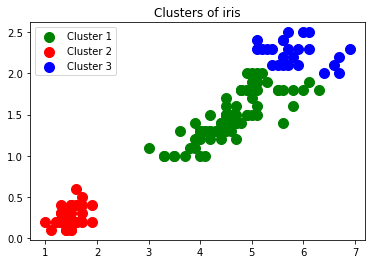

In [17]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(X_projected)
predict = clustering.fit_predict(X_projected)

plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.title('Clusters of iris')
plt.legend()
plt.show()

Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

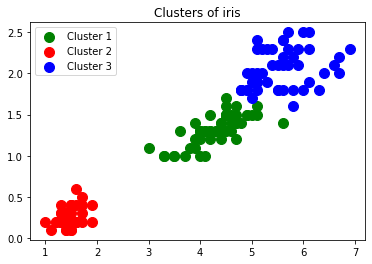

In [18]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++')
predict = kmeans.fit_predict(X_projected)
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.title('Clusters of iris')
plt.legend()
plt.show()

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

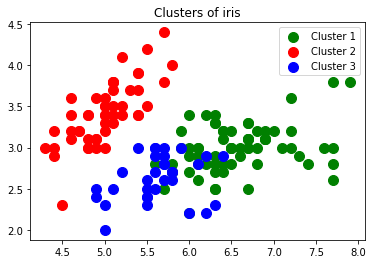

In [19]:
dataset = pd.read_csv('iris.csv', header = 0)
X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:, 4].values

clustering = AgglomerativeClustering(n_clusters = 3).fit(X)
predict = clustering.fit_predict(X)

plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.title('Clusters of iris')
plt.legend()
plt.show()

The quality of the 4-d clusterings is highly volatile and produces results that are hard to decipher. Comparing these results to the 2-D clusterings, I could easily say that the results for the 2-D clusters are much better. Projection like dimensionality reduction can help alleviate some of the problems caused by having a large amount of features. Projection involves a mapping a high-dimensional space to a lower-dimensional space. Dimension reduction is a really useful concept in data science, especially when you have a large number of features. The benefit of reducing the number of features used (dimensions) is to prevent the model from overfiiting. Additionally, using less data could require less computing leading to faster training times for models, and could also significantly reduce the noise in models. 


## Problem 2

In this problem, you will first implement the Naive Bayes (NB) algorithm from scratch. We will use a dataset for classifying if a patient has breast cancer. Each instance (row) in the dataset is a patient described by the 9 following features (with their corresponding values).

1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10

Given these features, we will classify a car into one of the 2 classes: 0 (benign) or 1 (malignant).

NB is a very simple algorithm. Consider a feature **X**. For each value **$x_i$** of **X** and each class label **$y_j$**, NB calculates the value of $P(X = x_i | Y = y_j)$. For example, take the feature **Mitoses**, NB will calculate all the following values:

- P(Mitoses = 1 | Class = 0), P(Mitoses = 2 | Class = 0), P(Mitoses = 3 | Class = 0), ... , P(Mitoses = 10 | Class = 0)
- P(Mitoses = 1 | Class = 1), P(Mitoses = 2 | Class = 1), P(Mitoses = 3 | Class = 1), ... , P(Mitoses = 10 | Class = 1)

Repeat this calculation for all the features. In the end, NB keep a recording of all possible $P(X | Y)$. The calculation itself is intuitive:

$$
 P(X = x_i | Y = y_j) = \frac{\text{Number of rows with } X = x_i \text{ and } Y = y_j}{\text{Number of rows with } Y = y_j}
$$

In addition, NB also calculate the priors probability $P(Y = y_j)$. Again, intuitively:

$$
 P(Y = y_i) = \frac{\text{Number of rows with } Y = y_j}{\text{Number of rows in the dataset}}
$$

Given a test example $X_{test} = \{ X_0 = x_0, X_1 = x_1, \ldots, X_i = x_i\}$, for each class label $y_j$, NB calculate:

$$
\begin{align}
 P(Y = y_j | X_{test}) & = P(X_{test} | Y = y_j)P(Y = y_j) \\
                       & = P(X_0 = x_0 | Y = y_j)P(X_1 = x_1 | Y = y_j) \ldots P(X_i = x_i | Y = y_j)P(Y = y_j)
\end{align}
$$

Such calculation is easy since we have bookkept all $P(X | Y)$ and all $P(Y)$ in previous steps. The output of the model is simply:

$$
 \underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})
$$

You will do each of these steps following this problem. We will use Pandas to deal with the data in this problem. Pandas can do queries like "Get all the rows in which Clump Thickness = 2 and Class = 1" with minimal syntax.


a) First let's load the dataset and store it in a Pandas dataframe. Play with the dataframe and get used to the queries (this part is not graded). This guide is a good place to start:

https://medium.com/python-in-plain-english/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c 

Split the dataset into a training set and a testing set. Use 10% of the data as the testing set (The splitting is graded).

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import random 
import csv 

In [38]:
dataset = pd.read_csv('breast-cancer-wisconsin.csv', header = 0)
dataset = dataset.values
dataset = list(dataset)                  

In [45]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
def splitting(dataset, ratio):  
    testingData = list(dataset) 
     # num of samples in training set using ration
    train_num = int(len(dataset) * ratio)
    #store all the training datapoints
    trainingData = [] 
    while len(trainingData) < train_num: 
        index = random.randrange(len(testingData)) 
        #pop from testing -> add to training 
        trainingData.append(testingData.pop(index)) 
    return trainingData, testingData
# Use 10% of the data as the testing set
trainingData, testingData = splitting(dataset, 0.9) 

b) Now we will build up the bookkeeping. Let's start with the priors $P(Y = y_j)$, $y_j \in$ {0,1}. For each of these labels, calculate $P(Y = y_j)$ by simply counting the number of times $y_j$ appears in the dataset divided by the size of the dataset. You can bookkeep the priors in a dictionary with keys being $y_j$.

In [103]:
#  counting the number of times  𝑦𝑗  appears in the dataset divided by the size of the dataset
def bookKeeping(data): 
#     store y data
    yStore = {} 
    for i in range(len(data)): 
        # keep track [-1] data 
        if (data[i][-1] not in yStore): 
            yStore[data[i][-1]] = [] 
        yStore[data[i][-1]].append(data[i]) 
    return yStore 

In [114]:
def standardDeviation (count): 
    average = sum(count) / float(len(count)) 
    variance = sum([pow(i - average, 2) for i in count]) / float(len(count) - 1) 
    return math.sqrt(variance) 
  
def individualMSD(data): 
    track = [(sum(i) / float(len(i)) , standardDeviation(i)) for i in zip(*data)] 
    del track[-1] 
    return track 

def eachClassMSD(data): 
    trackEachClass = {} 
    yStore = bookKeeping(data) 
    for classValue, instances in yStore.items(): 
        trackEachClass[classValue] = individualMSD(instances) 
    return trackEachClass

# need to get calculations for each class 
# avg/variance -> std
# then get for individual -> then each class 
allCalc = eachClassMSD(trainingData)


Now let's calculate the conditional probability $P(X = x_i | Y = y_j)$. If you do the query with Pandas, this counting should be simple. This time, store the conditional probability in another dictionary with keys ($x_i$, $y_j$) or any data structure that you prefer. 

In [115]:
# Calculate conditional probability classes 𝑃(𝑋=𝑥𝑖|𝑌=𝑦𝑗)
def conditionalProbability(allCalculations, data): 
    classProb = {} 
    for x, y in allCalculations.items(): 
        classProb[x] = 1
        for i in range(len(y)): 
            mean, stdev = y[i] 
            value = data[i] 
            expo = math.exp(-(math.pow(value - mean, 2) / (2 * math.pow(stdev, 2)))) 
            classProb[x] *= (1 / (math.sqrt(2 * math.pi) * stdev)) * expo 
    return classProb 

That's it! You have successfully "trained" a NB model. Let's test our model on the test dataset.

Implement a **predict** function that returns $\underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})$ (refer to the description above). 

In [203]:
# Implement a predict function that returns  argmax𝑦𝑗𝑃(𝑌=𝑦𝑗|𝑋𝑡𝑒𝑠𝑡) 
def predict(allCalc, test_data): 
    prob = conditionalProbability(allCalc, test_data) 
    x, y = None, -1
    for classProb, probability in prob.items(): 
        if x is None or probability > y: 
            x = classProb
            y = probability  
    return x 
  
def predictionsTestSet(allCalc, test_data): 
    predictions = [] 
    for i in range(len(test_data)): 
        result = predict(allCalc, test_data[i]) 
        predictions.append(result) 
    return predictions 
  

Predict the label of all the instances in the test dataset, calculate and print out the accuracy.

In [206]:
predictions = predictionsTestSet(allCalc, testingData) 
# Predict the label of all the instances in the test dataset
print(predictions)

def accuracyCalc(testingData, predictions): 
    count = 0
    for i in range(len(test)): 
#         check if same as predictions 
        if test[i][-1] == predictions[i]: 
            count += 1
    return (count / float(len(testingData))) * 100.0
accuracy = accuracyCalc(testingData, predictions) 
# calculate and print out the accuracy
print("Accuracy: ", accuracy)

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]
Accuracy:  95.71428571428572


## Problem 3

In this problem, you will implement the Logistic Regression (LR) algorithm from scratch. Similar to NB, LR relies on $P(Y|X)$ to predict the class of an example. However, unlike NB, a generative model, LR is a discriminative model so it does not need to estimate $P(X|Y)$ and $P(Y)$. LR assumes the form of the conditional probability $P(Y|X)$ to be:

$$
    P(Y | X) = f(X) = \frac{1}{1 + e^{-(\alpha X + \beta)}}
$$

$f(X)$ returns a value in (0,1). The model classifies $X$ as $1$ if $f(X)$ is closer to $1$ and $0$ otherwise. We have to estimate the model parameters: the vector $\alpha$ and $\beta$ from the data, which we will do via stochastic gradient descent (SGD). In SGD, a training example is shown to the model each at a time. The model makes a prediction on the training example and the error between the prediction and the ground-truth label is used to update the model's parameters. We use the log-likelihood loss to estimate the error in this problem. In particular, the log-likelihood loss for classifying the $X^{(i)}$ example with the ground-truth $y^{(i)}$ is: 

$$
    LL(y^{(i)},f(X^{(i)})) = -(y^{(i)} \log(f(X^{(i)})) + (1 - y^{(i)}) \log(1 - f(X^{(i)})))
$$

In our case, the updating is as the followings:

$$
\alpha_{j}(t+1) = \alpha_{j}(t) - \frac{\partial LL}{\partial \alpha_j} \times rate
$$

$$
\beta(t+1) = \beta(t) - \frac{\partial LL}{\partial \beta} \times rate
$$

where $rate$ is the how much change we want to make to the parameters in each update. Whenever we finish looping through all the instances in the dataset to update the parameters, we finish a training epoch. We may do many training epochs (looping through the dataset many times), until the model parameters converge.

First, we need to derive the formula for $\frac{\partial LL}{\partial \alpha_j}$ and $\frac{\partial LL}{\partial \beta}$. To keep the problem simple, these are provided to you:

$$
    \frac{\partial LL}{\partial \alpha_j} = -(y^{(i)} - f(X^{(i)}))X^{(i)}_{j}
$$

$$
    \frac{\partial LL}{\partial \beta} = -(y^{(i)} - f(X^{(i)}))
$$

a) We use the same dataset for predicting breast cancer in Problem 2 for this problem. Load the dataset and split it into a training set and a testing set.

In [187]:
from sklearn.model_selection import train_test_split
df = pd.read_csv( 'breast-cancer-wisconsin.csv') 
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1:].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) 

b) Learn the model parameters using SGD. A skeleton for SGD is provided to help you understand the process (You don't have to use the provided code). 

In [188]:
# create a class and initialize the rate, epochs, and training data
class LR(): 
        def __init__( self, rate, epochs,X_train, y_train ) :         
            self.rate = rate         
            self.epochs = epochs 
            self.X_train = X_train        
            self.y_train = y_train 
        def fit( self) :         
            self.trainingCount, self.featuresCount = X_train.shape         
            self.weights = np.zeros( self.featuresCount )         
            self.b = 0        
        #     for epoch in range(epochs):
        #     # for instance in traning dataset:
        #         # Update parameters
            for i in range(self.epochs) :             
                self.updateParameters()             
            return self
#         use rate and epochs and update parameters based on equations 
        def updateParameters(self) :            
            A = 1 / (1 + np.exp(- (self.X_train.dot(self.weights ) + self.b )))      
            calc =  (A - self.y_train.T)         
            calc = np.reshape(calc, self.trainingCount) 
            # dot/divide by count 
            changeWeight = np.dot( self.X_train.T, calc ) / self.trainingCount          
            changeB = np.sum( calc ) / self.trainingCount  
            # weight = weight - rate*dW
            self.weights = self.weights - self.rate * changeWeight   
#             find b - rate* db
            self.b = self.b - self.rate * changeB 
            return self 
        
        # predict with test set 
        def predict( self, X_test ) :     
            Z = 1 / ( 1 + np.exp( - ( X_test.dot( self.weights ) + self.b ) ) )         
            Y = np.where( Z > 0.5, 1, 0 )         
            return Y 

c) Load the testing dataset. Use $f(X)$ to predict the labels of the test instances. Calculate the accuracy.

In [189]:
epochs = 20 # epochs 
rate = 0.01 # learning rate 

model = LR(rate,epochs,X_train,y_train )
model.fit()
# predict the labels of the test instances
Y_pred = model.predict(X_test) 
for i in range(np.size( Y_pred ) ) :   
    if y_test[i] == Y_pred[i] :             
        accuracy += 1
    i += 1    
#  Calculate the accuracy.
print("Accuracy:",(accuracy/i)*100) 

Accuracy: 75.71428571428571


## Problem 4

In this problem, you will investigate how the size of the training data on the performance of a generative model (NB) and a discriminative model (LR). **You are free to use scikit-learn's NB and LR.** 

a) Load the breast cancer training dataset and split it into a training set and a testing set. 

In [20]:
dataset = pd.read_csv('breast-cancer-wisconsin.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

b) We will train NB classifiers that use only a portion of the training data. Let's vary this portion from 1% to 100% of the training set (100 iterations). For each portion value, sample the training set according to the portion, train a NB classifer on this portion of the training set, and evaluate the model accuracy on the testing set.  

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

dict_NB = {}
for i in range(1,100):
    classifier = MultinomialNB()
    classifier.fit(X_train[:i], y_train[:i])
    y_pred1 = classifier.predict(X_test)
    dict_NB[i] = accuracy_score(y_test, y_pred1)
    print(accuracy_score(y_test, y_pred1))

0.3357142857142857
0.7357142857142858
0.75
0.7285714285714285
0.7428571428571429
0.7428571428571429
0.7357142857142858
0.7642857142857142
0.7428571428571429
0.8785714285714286
0.8857142857142857
0.8714285714285714
0.8785714285714286
0.8785714285714286
0.8785714285714286
0.8642857142857143
0.8642857142857143
0.8571428571428571
0.8642857142857143
0.85
0.8428571428571429
0.85
0.8428571428571429
0.8285714285714286
0.8357142857142857
0.8714285714285714
0.8785714285714286
0.8857142857142857
0.8857142857142857
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8857142857142857
0.9071428571428571
0.8928571428571429
0.9
0.9
0.9
0.8928571428571429
0.8857142857142857
0.8857142857142857
0.9
0.9
0.9071428571428571
0.8928571428571429
0.9
0.9071428571428571
0.9071428571428571
0.9071428571428571
0.9
0.8857142857142857
0.8928571428571429
0.8928571428571429
0.9
0.9071428571428571
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.8928571428571429
0.8928571428571429
0.9071428571428571
0.9071428571428571
0.9
0.907

Plot the accuracies of the models versus the portion of the training set used. Comment on the effect of increasing the size of the training dataset on the performance of NB.

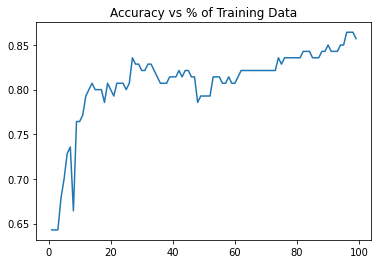

In [192]:
import matplotlib.pylab as plt
lists = sorted(dict_NB.items())
x, y = zip(*lists) 
plt.plot(x, y)
plt.title('Accuracy vs % of Training Data')
plt.show()

c) Repeat part **b** with LR.

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt

dict_LR = {}
for i in range(1,100):
    classifier = LogisticRegression()
    classifier.fit(X_train[:i], y_train[:i])
    y_pred1 = classifier.predict(X_test)
    dict_LR[i] = accuracy_score(y_test, y_pred1)
    print(accuracy_score(y_test, y_pred1))
    
lists = sorted(dict_LR.items())
x, y = zip(*lists) 


0.9071428571428571
0.9
0.9
0.9
0.9142857142857143
0.9142857142857143
0.9142857142857143
0.9142857142857143
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9357142857142857
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.9428571428571428
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.8928571428571429
0.9
0.9
0.9
0.9
0.9
0.9
0.8785714285714286
0.8714285714285714
0.8785714285714286
0.8714285714285714
0.8785714285714286
0.878571428571

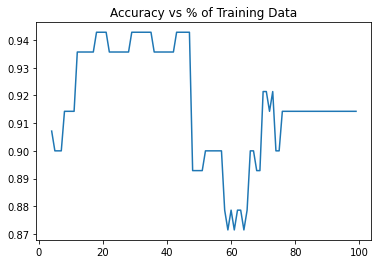

In [201]:
plt.plot(x, y)
plt.title('Accuracy vs % of Training Data')
plt.show()

Between a generative model (NB) and a discriminative model (LR), which is more affected by small training dataset? Think about a reason for this.

The generative model (NB) appears to be more affected by a small training set. Thining about this logically it should work the opposite way as generative models usually need less data to train in comparison to discriminative models because they make stronger assumptions. The reson why it is like this in our case could be that generative model attempts to model the distribution of individual classes causing it to be more affected by the small training dataset

## Problem 5

What is the hyperparameters, the parameters, and the objective function for finding the best hypothesis for each of the following methods:

1. Decision Tree (Entropy gain)
2. Support Vector Machine
3. K-nearest Neighbors Clustering

Decision Tree

Parameters: Max number of features, number of leaf nodes, the weights associated with each class

Hyperparameters: function to measure the quality of a split (Entropy), Maximum depth of the Tree, strategy used to choose the split each node, min number of samples required to split a node, minimum number of samples required to be at a leaf node, number of features to consider when looking for the best split

Objective function for finding the best hypothesis: calculate the number of misclassified nodes and try to optimize/minimize this cost, can use something like entroy to measure the quality of the split 

Support Vector Machine 

Parameters: Coefficients (weights assigned to the features), function of support vectors, the class labels 

Hyperparameters: Regularization parameter (amount of penalty for each misclassified data point), kernel type, degree of the polynomial function, number of iterations used

Objective function for finding the best hypothesis: hinge loss function, looks at misclassified points and increases hinge loss exponentially  